<a href="https://colab.research.google.com/github/ctruciosm/ME414-unicamp/blob/main/ME414_LabR_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratório de R: 01

## Importando dados
- `read.csv()`
- `read.table()`

In [1]:
url = "https://raw.githubusercontent.com/ctruciosm/ctruciosm.github.io/master/datasets/titanic.csv"
titanic = read.csv(url)
head(titanic)  # mostra as primeiras linhas do dataset

,X,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,892,0,3rd,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
2,2,893,1,3rd,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
3,3,894,0,2nd,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
4,4,895,0,3rd,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
5,5,896,1,3rd,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
6,6,897,0,3rd,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


O pacote `dplyr` é bastante utilizado para manupulacao do banco de dados.

In [2]:
# Para instalar
# install.packages("dplyr")
# Para carregar
library(dplyr)  # Toda vez (por sessao) que for utilizar


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
glimpse(titanic)  # para ver rapidamente a estrutura dos dados

Rows: 1,309
Columns: 13
$ X           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ PassengerId <int> 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903…
$ Survived    <int> 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1…
$ Pclass      <chr> "3rd", "3rd", "2nd", "3rd", "3rd", "3rd", "3rd", "2nd", "3…
$ Name        <chr> "Kelly, Mr. James", "Wilkes, Mrs. James (Ellen Needs)", "M…
$ Sex         <chr> "male", "female", "male", "male", "female", "male", "femal…
$ Age         <dbl> 34.5, 47.0, 62.0, 27.0, 22.0, 14.0, 30.0, 26.0, 18.0, 21.0…
$ SibSp       <int> 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0…
$ Parch       <int> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Ticket      <chr> "330911", "363272", "240276", "315154", "3101298", "7538",…
$ Fare        <dbl> 7.8292, 7.0000, 9.6875, 8.6625, 12.2875, 9.2250, 7.6292, 2…
$ Cabin       <chr> "", "", "", "", "", "", "", "", "", "", "", "", "B45", "",…
$ Embarked    <c

In [5]:
# Tabelas de Frequencia
## funcao table calcula tabela de frequencias
table(titanic$Pclass)   # "$" é para selecionar variavel


1st 2nd 3rd 
323 277 709 

In [6]:
help(table)  # help() serve para abrir a documentacao da funcao

In [7]:
prop.table(table(titanic$Pclass))  # Frequencia relativa


      1st       2nd       3rd 
0.2467532 0.2116119 0.5416348 

In [8]:
100*prop.table(table(titanic$Pclass))  # Frequencia %


     1st      2nd      3rd 
24.67532 21.16119 54.16348 

In [10]:
# Tabela de Freq: add margens
addmargins(table(titanic$Pclass))


 1st  2nd  3rd  Sum 
 323  277  709 1309 

In [11]:
addmargins(prop.table(table(titanic$Pclass)))


      1st       2nd       3rd       Sum 
0.2467532 0.2116119 0.5416348 1.0000000 

In [14]:
# Forma alternativa: utilizando o "pipe" (%>%) no Rstudio: ctrl + m
titanic %>% select(Pclass) %>% table() %>% prop.table() %>% addmargins()

Pclass
      1st       2nd       3rd       Sum 
0.2467532 0.2116119 0.5416348 1.0000000 

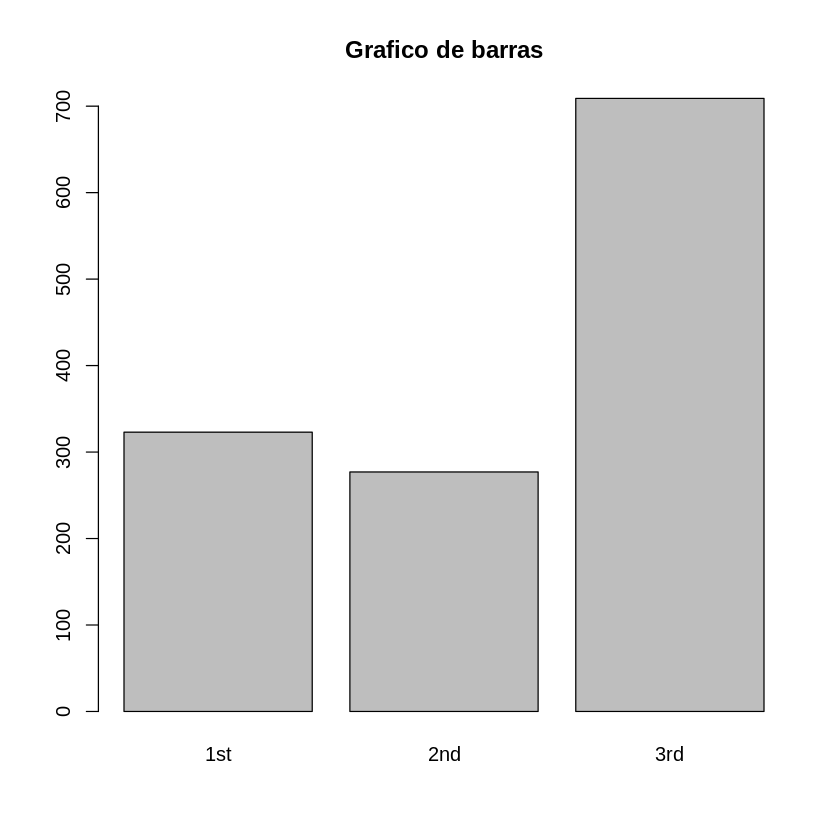

In [17]:
barplot(table(titanic$Pclass), main = "Grafico de barras")

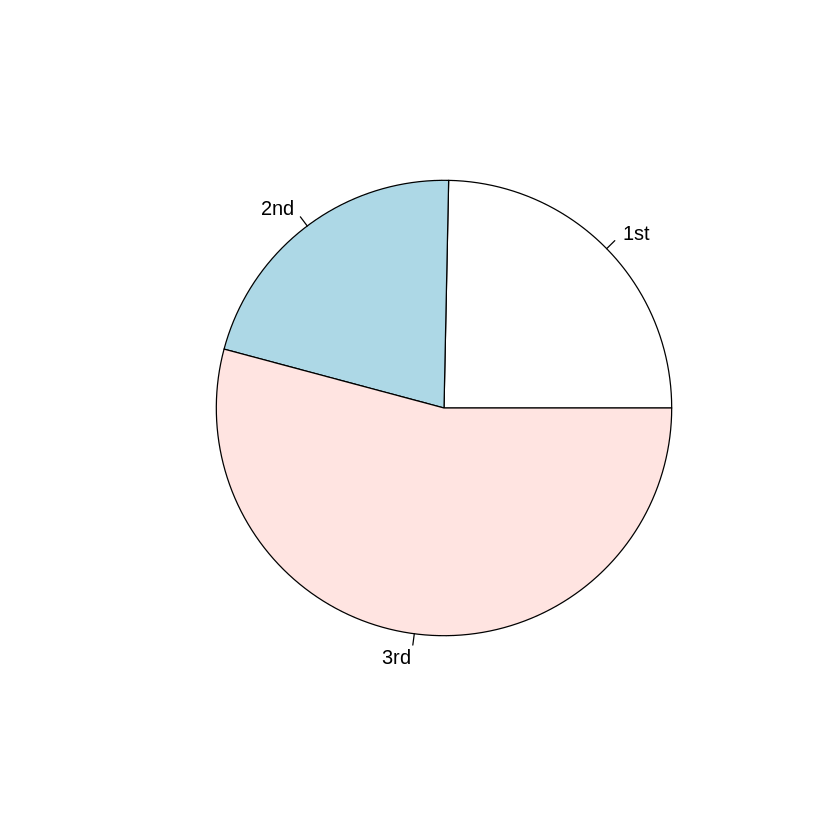

In [19]:
pie(prop.table(table(titanic$Pclass)))

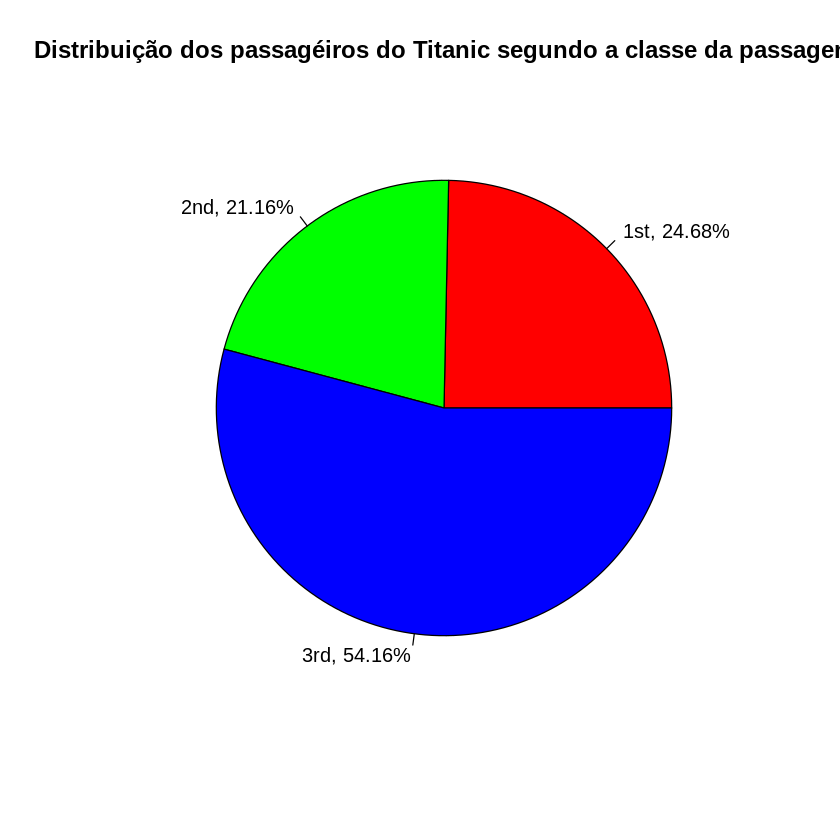

In [21]:
proportion <- prop.table(table(titanic$Pclass))
lbls <- paste(names(proportion), paste(round(as.numeric(proportion)*100,2),"%",sep=""), sep = ", ")
pie(proportion, labels = lbls, col=rainbow(length(lbls)), main = "Distribuição dos passagéiros do Titanic segundo a classe da passagem")


In [23]:
# Utilizar a variável sexo e fazer tabelas de frequencia e grafico de barras

prop.table(table(titanic$Sex))


   female      male 
0.3559969 0.6440031 

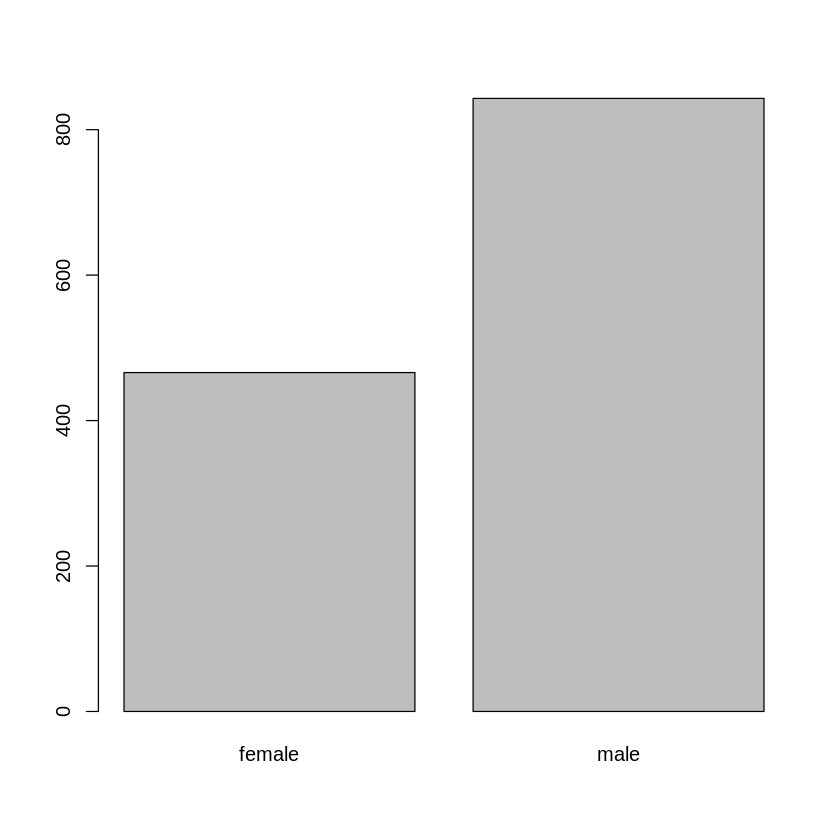

In [24]:
barplot(table(titanic$Sex))

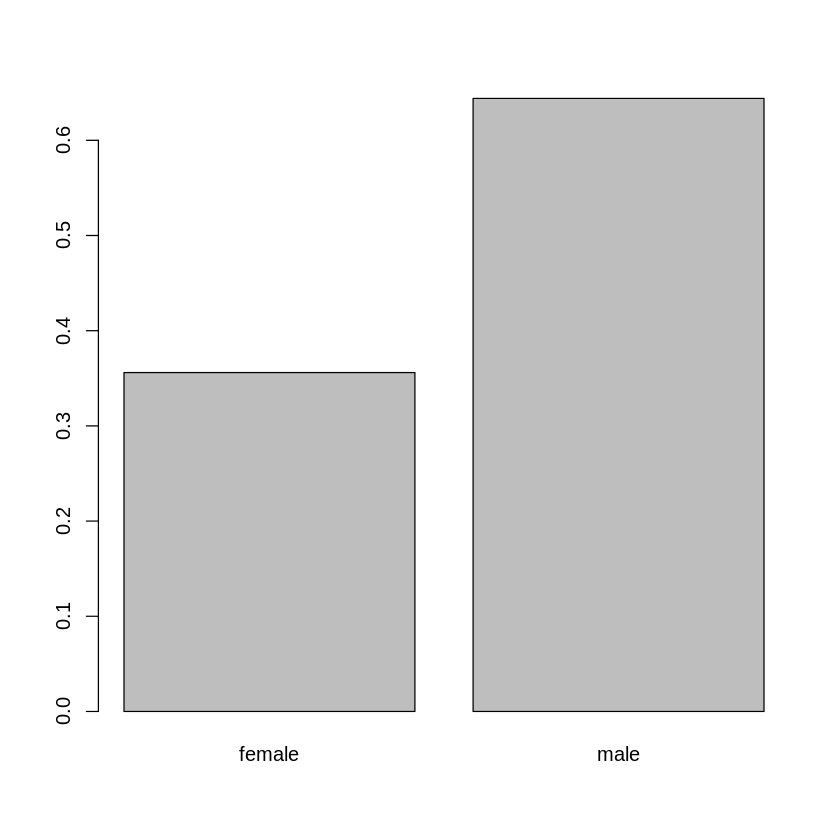

In [25]:
barplot(prop.table(table(titanic$Sex)))

In [26]:
# E se quisermos uma tabela de continguencia entre Pclass e Sex?

table(titanic$Pclass, titanic$Sex)

     
      female male
  1st    144  179
  2nd    106  171
  3rd    216  493

In [27]:
addmargins(table(titanic$Pclass, titanic$Sex))

,female,male,Sum
1st,144,179,323
2nd,106,171,277
3rd,216,493,709
Sum,466,843,1309


In [28]:
addmargins(prop.table(table(titanic$Pclass, titanic$Sex)))

,female,male,Sum
1st,0.11000764,0.1367456,0.2467532
2nd,0.08097785,0.1306341,0.2116119
3rd,0.16501146,0.3766234,0.5416348
Sum,0.35599694,0.6440031,1.0000000


In [ ]:
# Fazer uma tabela de freq. relativa das variaveis sex e survived

In [30]:
titanic$Survived2 = factor(titanic$Survived, label = c("morreu", "nao morreu"))

In [31]:
table(titanic$Sex, titanic$Survived2)

        
         morreu nao morreu
  female     81        385
  male      734        109